In [32]:
from qiskit import QuantumCircuit
from qiskit.circuit import QuantumRegister, ClassicalRegister
from qiskit.circuit.library.phase_oracle import PhaseOracle


# NumPy, SciPy e ferramentas de otimização
import numpy as np
from scipy.optimize import minimize

# Visualização
import matplotlib.pyplot as plt
from qiskit.visualization import plot_histogram, array_to_latex, plot_state_city
from rustworkx.visualization import mpl_draw as draw_graph

# Estruturas de grafos
import networkx as nx
import rustworkx as rx

# Qiskit: circuitos e operadores
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp, Statevector, Operator
from qiskit.circuit.library import QAOAAnsatz
import time


# Qiskit Runtime (estimador e sampler)
from qiskit_ibm_runtime import QiskitRuntimeService, Session, EstimatorV2, SamplerV2

# Aer Simulator (se quiser simulação local)
from qiskit_aer.primitives import Estimator
from qiskit_aer.primitives import EstimatorV2
from qiskit_aer import AerSimulator

In [33]:
def oraculo(qc,caso):
    if caso == 'Constante': 
        return None
    elif caso == 'Balanceada':
        qc.cx = (0,1);
    else: 
        return print("Constante ou Balanceada") 
    
    




Constante ou Balanceada


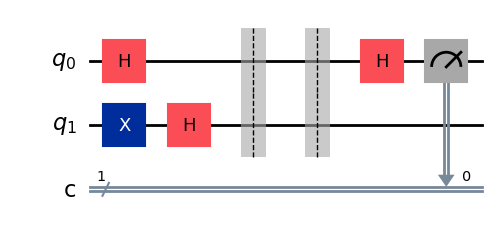

In [34]:
qc = QuantumCircuit(2,1) 
qc.h(0)
qc.x(1)
qc.h(1) 

qc.barrier()

# Entra o Oráculo 
oraculo(qc, 'Balanceado')

qc.barrier()
qc.h(0) 

qc.measure(0, 0)

qc.draw("mpl")

{'0': 1}


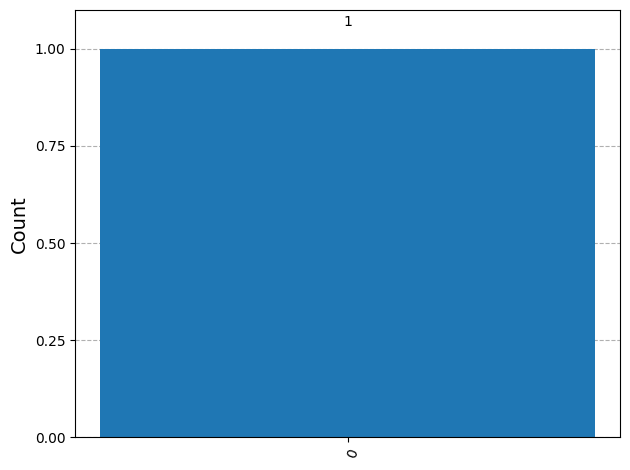

In [44]:
simulator = AerSimulator()
job = simulator.run(qc, shots=1)
result = job.result()
counts = result.get_counts(qc)

print(counts)  # If '0': constant; if '1': balanced
plot_histogram(counts)

For constant oracle: {'0': 1}
For balanced oracle: {'1': 1}


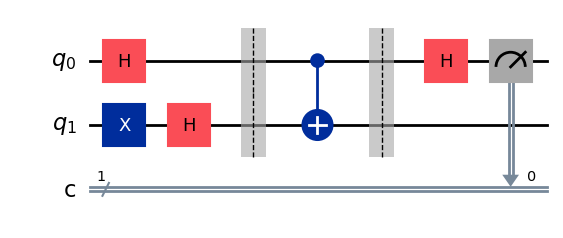

In [62]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator

def oraculo(qc, case):
    if case == 'balanced':
        # Balanced: f(0)=0, f(1)=1
        qc.cx(0, 1)
    elif case == 'constant':
        # Constant: f(x)=0 (do nothing)
        pass
    else:
        raise ValueError("Case must be 'constant' or 'balanced'")

def run_deutsch(case):
    qc = QuantumCircuit(2, 1)
    qc.h(0)
    qc.x(1)
    qc.h(1)
    qc.barrier()
    oraculo(qc, case)
    qc.barrier()
    qc.h(0)
    qc.measure(0, 0)
    
    simulator = AerSimulator()
    job = simulator.run(qc, shots=1)
    result = job.result()
    counts = result.get_counts(qc)
    
    print(f"For {case} oracle: {counts}")
    # If '0': constant; if '1': balanced
    return qc, counts

# Test both
qc_const, counts_const = run_deutsch('constant')
qc_bal, counts_bal = run_deutsch('balanced')

# Draw one circuit (e.g., balanced)
qc_bal.draw('mpl')

# Optional: plot_histogram(counts_bal)